In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ast
import datetime

# Data processing and first exploratory steps

Note that most of the preprocessing steps (especially to clean and extract specific informations from more complex features) are taken from the work of [The Story of Film](https://www.kaggle.com/rounakbanik/the-story-of-film), a publicly available notebook on the Kaggle kernel section attached to the dataset used ([The Movies Dataset](https://www.kaggle.com/rounakbanik/the-movies-dataset)).

## Metadata

In [2]:
metadata = pd.read_csv('movies_dataset/movies_metadata.csv')

/home/pirate/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Let's precise what each column corresponds to. We have:
<ul>
    <li>adult: specify if the film is X-Rated/Adults only or not<\li>
    <li>belongs_to_collection: specify if the movie is part of a series of movies (such as the Harry Potter franchise)<\li>
    <li>poster_path: directly gives the path to the jpg poster image<\li>
    <li>budget: budget of the movie (in dollars)<\li>
    <li>revenue: revenue of the movie (in dollars)<\li>
    <li>genres: list of genres the movie is associated with <\li>
    <li>homepage: url to the homepage of the movie (if existing)<\li>
    <li>imdb_id: id in the IMDB database<\li>
    <li>original_language: language the movie was originally shot in<\li>
    <li>overview: short description of the story<\li>
    <li>release_date: release date of the movie (to be splitted in day, month and year for further analysis)<\li>
    <li>runtime: duration of the movie (in minutes)<\li>
    <li>spoken_languages: list of spoken languages in the movie<\li>
    <li>status: status of the film (Released, Rumored, Post Production, In Production, Planned, Canceled)<\li>
    <li>tagline: tagline of the movie (if existing)<\li>
    <li>title: title of the movie (in English)<\li>
    <li>original_title: original title of the movie (in the original language)<\li>
    <li>vote_average: average of all votes for the movie<\li>
    <li>vote_count: number of votes from which the vote_average is computed<\li>
    <li>popularity: popularity score of the movie<\li>
    <li>production_companies: list of companies that have produced the film<\li>
<\ul>

In [3]:
print('In the dataset there are %d movies.' %len(metadata))

In the dataset there are 45466 movies.


### Temporal dimension

Let's extract from the release_date feature the weekday, month and year for each movie. We will use the datetime function weekday() to extract the corresponding day of the week (as it is far more interesting than the actual number) and directly convert the month number to the corresponding name (01 to 'Jan' for instance).

In [4]:
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
day_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

In [5]:
def get_year(x):
    try:
        year = int(str(x).split('-')[0])
        #Check if year is larger than 1800 since some values do not make sense (a 1 has been found)
        if year < 1800:
            year = np.nan
        return year
    except:
        return np.nan

In [6]:
def get_month(x):
    try:
        return month_order[int(str(x).split('-')[1]) - 1]
    except:
        return np.nan

In [7]:
def get_day(x):
    try:
        year, month, day = (int(i) for i in x.split('-')) 
        answer = datetime.date(year, month, day).weekday()
        return day_order[answer]
    except:
        return np.nan

In [8]:
metadata['year'] = metadata.release_date.map(lambda x: get_year(x))
metadata['month'] = metadata.release_date.map(lambda x: get_month(x))
metadata['weekday'] = metadata.release_date.map(lambda x: get_day(x))

In [9]:
year_min = metadata.year.min()
year_max = metadata.year.max()
print('The first movie in the dataset has been released in %d and the last in %d.' %(year_min, year_max))

The first movie in the dataset has been released in 1874 and the last in 2020.


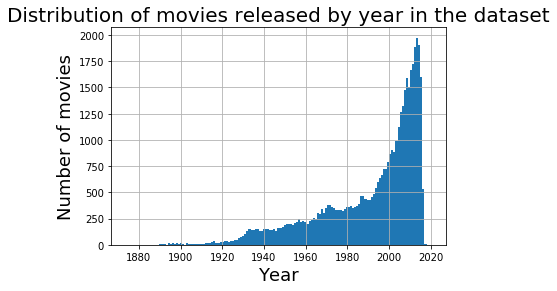

In [10]:
metadata.year.hist(bins = int(year_max - year_min + 1))
plt.title('Distribution of movies released by year in the dataset', fontsize = 20)
plt.xlabel('Year', fontsize = 18)
plt.ylabel('Number of movies', fontsize = 18)
plt.show()

### Adult

Let's observe the "adult" column. It seems only 9 movies are rated as X-Rated/Adults only, with three other movies containing erronous information (probably corresponding to the tagline of the film).

In [11]:
metadata.adult.value_counts()

False                                                                                                                             45454
True                                                                                                                                  9
 - Written by Ørnås                                                                                                                   1
 Avalanche Sharks tells the story of a bikini contest that turns into a horrifying affair when it is hit by a shark avalanche.        1
 Rune Balot goes to a casino connected to the October corporation to try to wrap up her case once and for all.                        1
Name: adult, dtype: int64

### Franchises

Let's extract the collection names from the belongs_to_collection feature. We can get rid of the poster path as this information is also provided in a dedicated column.

In [12]:
metadata['franchise'] = metadata[metadata['belongs_to_collection'].notnull()]['belongs_to_collection'].apply(ast.literal_eval).apply(lambda x: x['name'] if isinstance(x, dict) else np.nan)

Let's have a look at the 10 franchises with the most movies.

In [13]:
metadata['franchise'].value_counts().iloc[:10]

The Bowery Boys                           29
Totò Collection                           27
James Bond Collection                     26
Zatôichi: The Blind Swordsman             26
The Carry On Collection                   25
Pokémon Collection                        22
Charlie Chan (Sidney Toler) Collection    21
Godzilla (Showa) Collection               16
Dragon Ball Z (Movie) Collection          15
Charlie Chan (Warner Oland) Collection    15
Name: franchise, dtype: int64

### Productions countries

Let's extract the production country name for each movie.

In [19]:
metadata['production_countries'] = metadata['production_countries'].fillna('[]').apply(ast.literal_eval)
metadata['production_countries'] = metadata['production_countries'].apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else np.nan)

ValueError: malformed node or string: ['United States of America']

Let's have a look at the 10 countries where the most movies have been shot. Of course we expect the first to be the USA.

In [17]:
metadata['production_countries'].value_counts().iloc[:10]

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 1653, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[United States of America]    17851
[]                             6285
[United Kingdom]               2238
[France]                       1654
[Japan]                        1356
[Italy]                        1030
[Canada]                        840
[Germany]                       749
[India]                         735
[Russia]                        735
Name: production_countries, dtype: int64

### Budget and revenues

Let's observe the revenue and budget colums. We notice a lot of the values for the revenue and the budget are 0. This in fact represents the fact that we do not have information for those movies budget, therefore we will replace them by NaN values (to not skew further computations towards 0).

In [18]:
metadata.replace(0, np.nan, inplace = True)

The same process is applied to the budget, after converting it to numeric values, since some unclean values make Pandas cast it as a generic object.

In [259]:
metadata['budget'] = pd.to_numeric(metadata['budget'], errors='coerce')
metadata['budget'].replace(0, np.nan, inplace = True)

In [260]:
print('Out of %d movies, %d do not have a budget.' %(len(metadata), len(metadata[metadata['budget'].isnull()])))
print('Out of %d movies, %d do not have a budget.' %(len(metadata), len(metadata[metadata['revenue'].isnull()])))

Out of 45466 movies, 36576 do not have a budget.
Out of 45466 movies, 38058 do not have a budget.


We are missing budget and revenue values for a lot of movies, but still we have informations about these features on more than 7000 movies.

### Poster

Let's add the full path to the jpg poster images (as an image component, easier to handle later on our website).

In [261]:
base_poster_url = 'http://image.tmdb.org/t/p/w185/'
metadata['poster_path'] = "<img src='" + base_poster_url + metadata['poster_path'] + "' style='height:100px;'>"

### Languages

In [262]:
def check_lang(lang):
    #There are some numeric values and some nan, let's convert them all to np.nan
    if str(lang)[0].isnumeric() or str(lang)=='nan':
        return np.nan
    else:
        return str(lang)

In [263]:
metadata['original_language'] = metadata['original_language'].map(lambda x: check_lang(x))

In [264]:
metadata['original_language'].value_counts()

en    32269
fr     2438
it     1529
ja     1350
de     1080
      ...  
rw        1
lb        1
fy        1
la        1
gl        1
Name: original_language, Length: 89, dtype: int64

Since most of the movies are shot in English, we will only plot the top 20 original languages except for English.

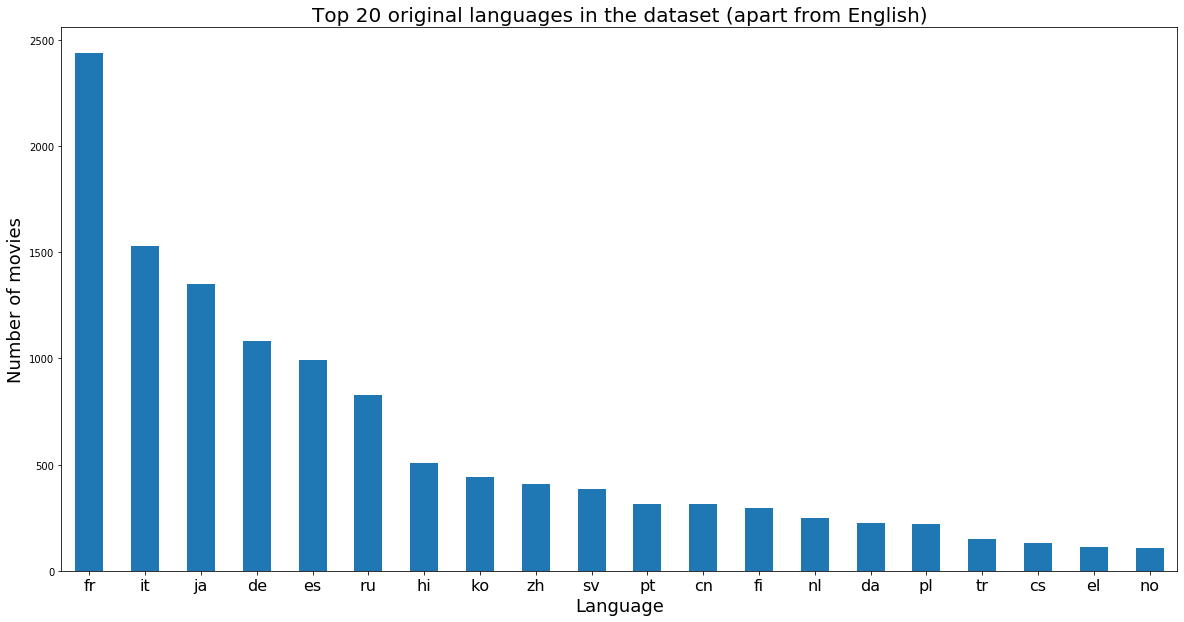

In [265]:
fig = plt.figure(figsize=(20,10))
metadata[metadata['original_language'] != 'en']['original_language'].value_counts().iloc[:20].plot(kind = 'bar')
plt.title('Top 20 original languages in the dataset (apart from English)', fontsize = 20)
plt.xlabel('Language', fontsize = 18)
plt.ylabel('Number of movies', fontsize = 18)
plt.xticks(rotation = 'horizontal', fontsize = 16)
plt.show()

For the spoken languages, let's extract the list of spoken languages (as ISO_639_1 codes).

In [266]:
def extract_spoken_lang(lang_list):
    try:
        lang_list = lang_list.split('},')
    except:
        return np.nan
    list = []
    for lang in lang_list:
        try:
            list.append(str(lang.split(',')[0].split(': ')[1][1:3]))
        except:
            list.append(np.nan)
    return list

In [267]:
metadata['spoken_languages'] = metadata['spoken_languages'].map(lambda x: extract_spoken_lang(x))

In [268]:
metadata['spoken_languages']

0            [en]
1        [en, fr]
2            [en]
3            [en]
4            [en]
           ...   
45461        [fa]
45462        [tl]
45463        [en]
45464       [nan]
45465        [en]
Name: spoken_languages, Length: 45466, dtype: object

### Vote and popularity

Let's start by cleaning and casting all scores as float.

In [269]:
def clean_numeric(x):
    try:
        return float(x)
    except:
        return np.nan

In [270]:
metadata['popularity'] = metadata['popularity'].apply(clean_numeric).astype('float')
metadata['vote_count'] = metadata['vote_count'].apply(clean_numeric).astype('float')
metadata['vote_average'] = metadata['vote_average'].apply(clean_numeric).astype('float')

For the popularity score, there seems to be some big outliers, with 75% of the movies having a popularity of only 3.68 and a maximum score at 547.49.

In [271]:
metadata['popularity'].describe()

count    45428.000000
mean         2.923536
std          6.007028
min          0.000000
25%          0.387078
50%          1.129104
75%          3.683010
max        547.488298
Name: popularity, dtype: float64

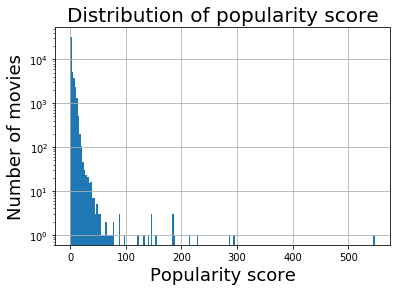

In [272]:
metadata['popularity'].hist(bins = 200)
plt.title('Distribution of popularity score', fontsize = 20)
plt.xlabel('Popularity score', fontsize = 18)
plt.ylabel('Number of movies', fontsize = 18)
plt.yscale('log') #A log scale is used to properly show the data since it is heavily skewed towards low popularity scores.
plt.show()

The average vote ranges from 0 to 10, with a mean value of 5.62 and 75% of the movies with a vote score below 6.8.

In [273]:
metadata['vote_average'].describe()

count    42462.000000
mean         6.014877
std          1.256208
min          0.500000
25%          5.300000
50%          6.100000
75%          6.900000
max         10.000000
Name: vote_average, dtype: float64

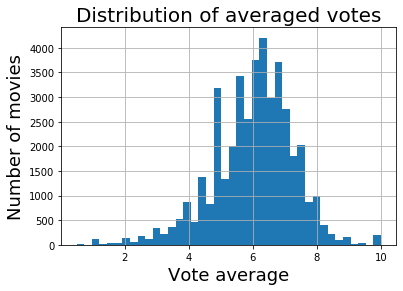

In [274]:
metadata['vote_average'].hist(bins = 40) #40 bins are chosen to have votes bins every 0.25 points
plt.title('Distribution of averaged votes', fontsize = 20)
plt.xlabel('Vote average', fontsize = 18)
plt.ylabel('Number of movies', fontsize = 18)
plt.show()

These votes are averaged over the votes of different users, more than 100 in average. Here again it is important to note there are some big outliers because we notice that 75% of the movies actually have only 34 votes.

In [275]:
metadata['vote_count'].describe()

count    42561.000000
mean       117.382886
std        506.901699
min          1.000000
25%          4.000000
50%         11.000000
75%         38.000000
max      14075.000000
Name: vote_count, dtype: float64

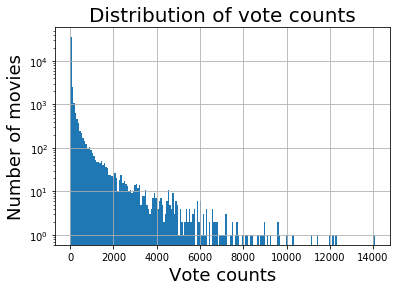

In [276]:
metadata['vote_count'].hist(bins = 200)
plt.title('Distribution of vote counts', fontsize = 20)
plt.xlabel('Vote counts', fontsize = 18)
plt.ylabel('Number of movies', fontsize = 18)
plt.yscale('log') #A log scale is used to properly show the data since it is heavily skewed towards few votes.
plt.show()

### Production companies

Let's extract the names of the production companies featured on each movie. This will help us later to find the biggest companies over time by linking this to the revenues, budgets and release dates of movies.

In [277]:
metadata['production_companies'] = metadata['production_companies'].fillna('[]').apply(ast.literal_eval)
metadata['production_companies'] = metadata['production_companies'].apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

In [278]:
metadata['production_companies'].head()

0                            [Pixar Animation Studios]
1    [TriStar Pictures, Teitler Film, Interscope Co...
2                       [Warner Bros., Lancaster Gate]
3             [Twentieth Century Fox Film Corporation]
4         [Sandollar Productions, Touchstone Pictures]
Name: production_companies, dtype: object

### Genres

Let's extract the various genres a movie is associated with.

In [279]:
metadata['genres'] = metadata['genres'].fillna('[]').apply(ast.literal_eval).apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

In [280]:
metadata['genres'].head()

0     [Animation, Comedy, Family]
1    [Adventure, Fantasy, Family]
2               [Romance, Comedy]
3        [Comedy, Drama, Romance]
4                        [Comedy]
Name: genres, dtype: object

## Credits

In [281]:
credits = pd.read_csv('movies_dataset/credits.csv')

In [282]:
credits.head()

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862


Let's make sure the ID columns are clean and numeric in order to join this dataframe with the metadata one later.

In [283]:
def convert_int(x):
    try:
        return int(x)
    except:
        return np.nan

In [284]:
metadata['id'] = metadata['id'].apply(convert_int)
credits['id'] = credits['id'].apply(convert_int)

We can now merge this dataframe with the metadata one.

In [285]:
metadata = metadata.merge(credits, on='id')
metadata.shape

(45538, 30)

### Cast

Let's extract the cast for each movie, keeping the name of the actor, its gender and the name of the character he/she has played. The gender is coded as 'Woman', 'Man' or 'Not defined'.

In [286]:
gender_dict = {0:'Not defined', 1:'Woman', 2:'Man'}
metadata['cast'] = metadata['cast'].apply(ast.literal_eval).apply(lambda x: [{'character':i['character'],'name':i['name'],'gender':gender_dict[i['gender']]} for i in x] if isinstance(x, list) else [])

In [287]:
metadata['cast'].iloc[0]

[{'character': 'Woody (voice)', 'name': 'Tom Hanks', 'gender': 'Man'},
 {'character': 'Buzz Lightyear (voice)', 'name': 'Tim Allen', 'gender': 'Man'},
 {'character': 'Mr. Potato Head (voice)',
  'name': 'Don Rickles',
  'gender': 'Man'},
 {'character': 'Slinky Dog (voice)', 'name': 'Jim Varney', 'gender': 'Man'},
 {'character': 'Rex (voice)', 'name': 'Wallace Shawn', 'gender': 'Man'},
 {'character': 'Hamm (voice)', 'name': 'John Ratzenberger', 'gender': 'Man'},
 {'character': 'Bo Peep (voice)', 'name': 'Annie Potts', 'gender': 'Woman'},
 {'character': 'Andy (voice)', 'name': 'John Morris', 'gender': 'Not defined'},
 {'character': 'Sid (voice)', 'name': 'Erik von Detten', 'gender': 'Man'},
 {'character': 'Mrs. Davis (voice)',
  'name': 'Laurie Metcalf',
  'gender': 'Woman'},
 {'character': 'Sergeant (voice)', 'name': 'R. Lee Ermey', 'gender': 'Man'},
 {'character': 'Hannah (voice)', 'name': 'Sarah Freeman', 'gender': 'Woman'},
 {'character': 'TV Announcer (voice)',
  'name': 'Penn Jille

### Crew

In [288]:
metadata['crew'] = metadata['crew'].apply(ast.literal_eval)

For the crew, let's create a function to extract a specific job and apply it in a function to get the director. 

In [289]:
def get_job(x, job):
    for i in x:
        if i['job'] == job:
            return i['name']
    return np.nan

def get_director(x):
    return get_job(x, 'Director')

In [290]:
metadata['director'] = metadata['crew'].apply(get_director)

Let's quickly have a look at the 10 most productive directors in the dataset.

In [291]:
metadata.director.value_counts().iloc[:10]

John Ford           66
Michael Curtiz      65
Werner Herzog       54
Alfred Hitchcock    53
Georges Méliès      51
Woody Allen         49
Jean-Luc Godard     47
Sidney Lumet        46
Charlie Chaplin     44
Raoul Walsh         43
Name: director, dtype: int64

There are of course a lot of other jobs we could have a look at for further analysis.